In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#Red txt data file 
with open("WhatsApp Chat with Young Data Professionals.txt", "r", encoding = "utf-8") as file:
    chats = file.readlines()
print(len(chats))

5019


In [3]:
#Remove new lines
chats = [line.strip() for line in chats]
chats[:10]
print(len(chats))

#Getting join notification lines
rifesh = [line for line in chats if  "joined using this" in line]

#Further cleaning
#Remove empty lines
rifesh = [line for line in rifesh if len(line) > 1]
print(len(rifesh))

5019
177


In [4]:
join = [line for line in rifesh if  "joined using this" in line]
join

["08/10/2019, 11:34 am - You joined using this group's invite link",
 "08/10/2019, 4:44 pm - +234 813 473 6436 joined using this group's invite link",
 "08/10/2019, 7:49 pm - +234 803 354 1004 joined using this group's invite link",
 "08/10/2019, 10:51 pm - +234 816 398 2854 joined using this group's invite link",
 "09/10/2019, 12:10 am - +234 817 957 3641 joined using this group's invite link",
 "09/10/2019, 1:17 am - +234 818 534 6200 joined using this group's invite link",
 "09/10/2019, 6:53 am - +234 706 364 7375 joined using this group's invite link",
 "09/10/2019, 8:39 am - +234 812 674 5707 joined using this group's invite link",
 "09/10/2019, 8:42 am - +234 802 825 9007 joined using this group's invite link",
 "09/10/2019, 8:48 am - +234 908 221 6060 joined using this group's invite link",
 "09/10/2019, 8:49 am - +234 902 384 2732 joined using this group's invite link",
 "09/10/2019, 8:52 am - +234 906 139 8325 joined using this group's invite link",
 "09/10/2019, 10:08 am - +2

In [5]:
len(join)

177

In [6]:
#Remove new lines
chats = [line.strip() for line in chats]
chats[:10]
print(len(chats))

#Clean out the join notification lines
rifesh = [line for line in chats if not "joined using this" in line]

#Further cleaning
#Remove empty lines
rifesh = [line for line in rifesh if len(line) > 1]
print(len(rifesh))

5019
4109


In [7]:
#Remove even more auto lines
rifesh = [line for line in rifesh if not "You revoked" in line]
print(len(rifesh))

4109


In [8]:
#Drop 'left-ers'
left = [line for line in rifesh if line.endswith("left")]
left

['11/10/2019, 8:33 am - +91 99873 83204 left',
 '05/11/2019, 10:36 am - +234 706 280 6584 left',
 '06/11/2019, 11:37 am - +27 84 747 2376 left',
 '22/11/2019, 6:43 pm - +234 701 676 6686 left',
 '30/11/2019, 5:26 pm - +234 803 584 4082 left',
 '27/12/2019, 8:04 pm - +234 814 245 0802 left',
 '27/12/2019, 10:31 pm - +44 7575 259209 left',
 '28/12/2019, 3:55 pm - +254 721 433278 left',
 '28/12/2019, 4:06 pm - +234 906 887 7194 left',
 '28/12/2019, 6:42 pm - +1 (214) 862-2763 left',
 '28/12/2019, 10:12 pm - +27 82 780 8535 left',
 '28/12/2019, 10:12 pm - +44 7432 021974 left',
 '28/12/2019, 10:13 pm - +234 906 057 4984 left',
 '28/12/2019, 10:38 pm - +234 816 083 0319 left',
 '29/12/2019, 11:36 am - +234 706 551 8058 left',
 '29/12/2019, 4:11 pm - +94 71 667 2477 left',
 '29/12/2019, 4:32 pm - Bethel left',
 '29/12/2019, 6:04 pm - +234 802 826 6988 left',
 '30/12/2019, 7:33 am - +234 806 474 5380 left',
 '30/12/2019, 1:22 pm - +91 86683 44150 left',
 '30/12/2019, 7:30 pm - +234 806 019 90

In [9]:
len(left)

40

In [10]:
#Remove all that 'left'
rifesh = [line for line in rifesh if not line.endswith("left")]
print(len(rifesh))

4069


In [11]:
#Merge messages that belong together
msgs = [] #message container
pos = 0 #counter for position of msgs in the container
"""
Flow:
For every line, see if it matches the expression which is starting with the format "number(s)+slash" eg "12/"
If it does, it is a new line of conversion as they begin with dates, add it to msgs container
Else, it is a continuation of the previous line, add it to the previous line and append to msgs, then pop previous line.
"""
for line in rifesh:
    if re.findall("\A\d+[/]", line):
        msgs.append(line)
        pos += 1
    else:
        take = msgs[pos-1] + ". " + line
        msgs.append(take)
        msgs.pop(pos-1)

len(msgs)

3070

In [12]:
msgs[1:9]

['06/10/2019, 4:04 pm - +27 61 290 0591 created group "Young Data Professionals"',
 "08/10/2019, 1:08 pm - +234 706 670 9874: Hi @27612900591 please don't forget to share. Thank you 🙏",
 '08/10/2019, 8:26 pm - +234 903 210 6832: Fiverr?',
 '08/10/2019, 8:28 pm - +234 803 584 4082: I tried the Google data studio today and I found it very awesome.',
 "08/10/2019, 8:40 pm - +234 815 308 9036: It's an amazing tool.",
 '08/10/2019, 8:43 pm - Richie: Ya it is but you need to have a good network provider',
 '08/10/2019, 8:43 pm - +234 817 190 1732: An amazing tool for quick insights not really  effective and efficient for diging deep',
 "08/10/2019, 8:43 pm - Opaino: That's not true o"]

In [13]:
#Drop first two lines: auto msg
msgs = msgs[2:]
len(msgs)

3068

In [14]:
#peep message format so far
msgs[50:55]

['08/10/2019, 9:55 pm - +234 909 778 5164: Right??',
 '08/10/2019, 9:56 pm - Opaino: Yeah',
 '08/10/2019, 9:56 pm - +234 909 778 5164: Hmm I have a problem with Indian tutors cos of their heavy accent though',
 '08/10/2019, 9:56 pm - +234 909 778 5164: Hard to understand sometimes',
 "08/10/2019, 9:58 pm - Opaino: This one don't have accent actually🤣"]

In [15]:

#make arrays of different parts of the messages
Date = []
Time = []
Number_Author = []
msg = []
counter = 0
for line in msgs:
    x = line.split()
    #Get the date
    dating = x[0]
    Date.append(dating.replace(',',''))
    
    #Get the time
    timing = x[1] + " " +x[2]
    Time.append(timing)
    
    #Get number
    num = " ".join(x[3:9]) #the parts numbers/names fall in
    try:
        match = re.search(r"- ([^']*):", num).group(1) #match between '- ' and ':' where they are per se
        Number_Author.append(match)
    except:
        Number_Author.append("-")
        pass
    #Get message
    #num = " ".join(x[3:8]) #num/name position
    #match = re.search(r"- ([^']*):", num).group(1) #isolate the num/name per se
    part = line.partition(match)[2] #partition according to the match and extract the last part, the msg
    msging = part[2:] #strip off the first two characters as they are ": "
    msg.append(msging)
    
#     counter += 1
#     print(counter)

print(len(Date), len(Time), len(Number_Author), len(msg))

3068 3068 3068 3068


In [16]:
#Put in a dataframe
rifesh_df = pd.DataFrame()
rifesh_df["Date"] = Date
rifesh_df["Time"] = Time
rifesh_df["Number_Author"] = Number_Author
rifesh_df["msg"] = msg

rifesh_df.head()

,Date,Time,Number_Author,msg
0,08/10/2019,1:08 pm,+234 706 670 9874,Hi @27612900591 please don't forget to share. ...
1,08/10/2019,8:26 pm,+234 903 210 6832,Fiverr?
2,08/10/2019,8:28 pm,+234 803 584 4082,I tried the Google data studio today and I fou...
3,08/10/2019,8:40 pm,+234 815 308 9036,It's an amazing tool.
4,08/10/2019,8:43 pm,Richie,Ya it is but you need to have a good network p...


Text(0.5, 1.0, 'Top 10 Time of Engagement')

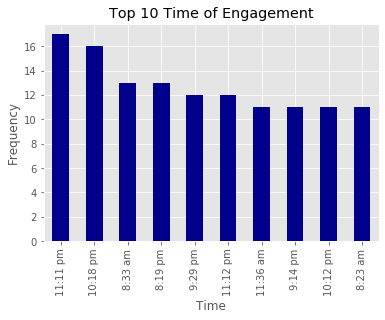

In [17]:
toptimeengaged = rifesh_df.Time.value_counts(ascending=False).head(10)
ax = toptimeengaged.plot(kind="bar", color='Darkblue')
ax.set_xlabel ('Time')
ax.set_ylabel ('Frequency')
ax.set_title("Top 10 Time of Engagement")

Opaino               527
Muhammed Analyst     222
Richie               179
+234 809 479 3406    128
+234 808 882 4940    125
+234 816 381 5935    105
+27 82 780 8535      104
Goodnews Ds          100
+234 805 444 1077     83
Obinna                66
Name: Number_Author, dtype: int64


Text(0.5, 1.0, 'Top 10 Users that sent more messages')

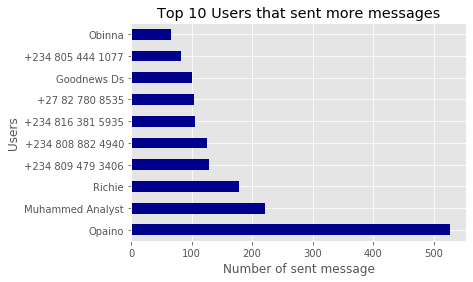

In [18]:
top10messengers = rifesh_df.Number_Author.value_counts(ascending=False).head(10)
print(top10messengers)
ax = top10messengers.plot.barh(color='Darkblue')
ax.set_xlabel ('Number of sent message')
ax.set_ylabel("Users")
ax.set_title("Top 10 Users that sent more messages")

In [19]:
rifesh_df['Letter_Count'] = rifesh_df['msg'].apply(lambda s : len(s))
rifesh_df['Word_Count'] = rifesh_df['msg'].apply(lambda s : len(s.split(' ')))

In [20]:
rifesh_df.head()

,Date,Time,Number_Author,msg,Letter_Count,Word_Count
0,08/10/2019,1:08 pm,+234 706 670 9874,Hi @27612900591 please don't forget to share. ...,57,10
1,08/10/2019,8:26 pm,+234 903 210 6832,Fiverr?,7,1
2,08/10/2019,8:28 pm,+234 803 584 4082,I tried the Google data studio today and I fou...,65,13
3,08/10/2019,8:40 pm,+234 815 308 9036,It's an amazing tool.,21,4
4,08/10/2019,8:43 pm,Richie,Ya it is but you need to have a good network p...,53,12


In [21]:
rifesh_df.describe(include='object')

,Date,Time,Number_Author,msg
count,3068,3068,3068,3068
unique,78,992,196,2555
top,30/12/2019,11:11 pm,Opaino,<Media omitted>
freq,497,17,527,173


In [22]:
rifesh_df.describe()

,Letter_Count,Word_Count
count,3068.000000,3068.000000
mean,70.070078,12.039113
std,161.340009,27.039775
min,0.000000,1.000000
25%,14.000000,2.000000
50%,30.000000,5.000000
75%,73.000000,12.000000
max,2552.000000,438.000000


In [23]:
rifesh_df['Letter_Count'].sum(), rifesh_df['Word_Count'].sum()

(214975, 36936)

Text(0.5, 1.0, 'Top 10 date of engagement')

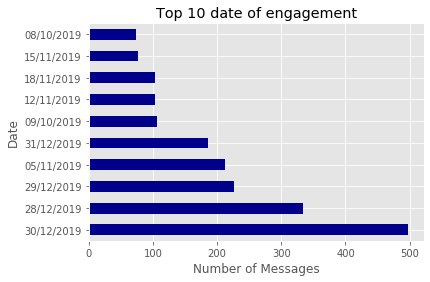

In [24]:
top10date = rifesh_df['Date'].value_counts().head(10)# Top 10 Dates on which the most number of messages were sent
ax = top10date.plot.barh(color= 'Darkblue')
ax.set_xlabel('Number of Messages')
ax.set_ylabel('Date')
ax.set_title('Top 10 date of engagement')

In [25]:
rifesh_df['Hour'] = rifesh_df['Time'].apply(lambda x : x.split(':')[0]) # The first token of a value in the Time Column contains the hour (Eg., "20" in "20:15")

Text(0.5, 1.0, 'Top Hours of engagement by Users')

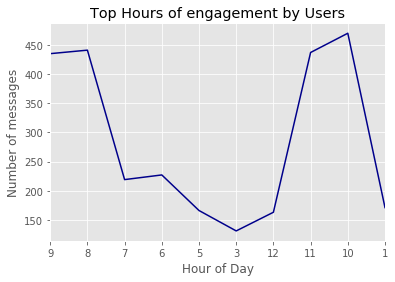

In [26]:
top10hourtochat = rifesh_df['Hour'].value_counts().head(10).sort_index(ascending=False) # Top 10 Hours of the day during which the most number of messages were sent
ax = top10hourtochat.plot.line(color='Darkblue')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of messages')
ax.set_title('Top Hours of engagement by Users')

In [28]:
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(rifesh_df.msg.str)

to           1079
the          1054
I             841
you           639
and           613
             ... 
~her~.          1
female).        1
course...       1
Learning"       1
Eggs".          1
Length: 7490, dtype: int64

In [29]:
def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)
    
    #Remove unneccessary word
    text = re.sub(r'omitted>', '', text)
    text = re.sub(r'<media', '<', text)
    text = re.sub(r'will', '', text)
    text = re.sub(r'thanks', '', text)
    
    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text

In [30]:
#Import list of stopwards
from wordcloud import STOPWORDS
from wordcloud import WordCloud


print(STOPWORDS)

{'a', 'your', 'been', 'these', "weren't", 'this', 'yourselves', 'any', "that's", 'too', "wasn't", 'herself', 'k', 'her', "we're", 'is', "can't", 'below', 'http', 'my', 'get', 'themselves', 'myself', 'for', 'when', 'so', 'all', 'our', 'than', 'we', 'over', 'how', 'you', 'at', 'while', 'them', 'would', "i'll", 'it', 'com', 'because', "they'll", 'where', 'should', "they've", "he'd", 'theirs', 'me', 'she', "aren't", 'other', "wouldn't", 'such', 'does', 'cannot', 'since', 'between', 'did', 'what', 'or', 'nor', 'do', 'itself', 'if', 'very', "you're", 'otherwise', 'however', 'with', 'most', 'else', 'him', 'ours', "what's", 'were', 'same', "she'd", 'be', 'also', "you'd", "we'll", 'its', "i'm", 'there', "we've", "why's", 'his', 'hence', 'above', "he's", 'yourself', 'am', "here's", 'off', 'yours', 'the', "mustn't", 'being', "you've", 'again', 'to', 'before', 'about', 'after', "where's", "hadn't", 'himself', "won't", "shan't", "hasn't", 'as', "she'll", "there's", "shouldn't", "doesn't", 'their', 

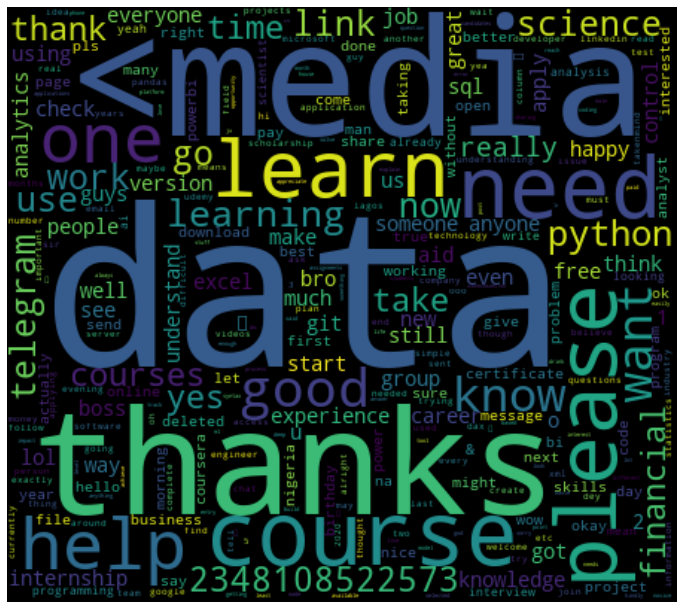

In [31]:
text = rifesh_df.msg.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=400, max_words=300, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
